In [73]:
import pandas as pd
import altair as alt
from vega_datasets import data

In [74]:
df = data.movies()

# Convert string dates to `datetime`
df["Release_Date"] = pd.to_datetime(df["Release_Date"], format="%b %d %Y")

# Fix invalid dates that are in wrong century
df.loc[df["Release_Date"] > "2012", "Release_Date"] -= pd.DateOffset(years=100)

# Having just the year separated from the full data will make charting and querying easier
df["Release_Year"] = df["Release_Date"].dt.year

In [75]:
# filtering df based on genre
genre_list = ['Action']
df_genre = df[df.Major_Genre.isin(genre_list)]

# filtering df_genre based on rating
rating_list = ['PG']
df_rating = df_genre[df_genre.MPAA_Rating.isin(rating_list)]

# filtering df_rating based on the year range
start_year = int('1915')
end_year = int('2011')
df_year = df_rating.query('Release_Year >= @start_year and Release_Year <= @end_year')
top_us_gross_df = (df_year[df_year['US_Gross']
                          .notnull()]
                          .sort_values("US_Gross", ascending=False)
                          .head(10))

# filtering version from Sree's file
# #Filter data as per user preference
# df["year"] = df.Release_Date.apply(lambda x: x.year)
# release_years = list(range(int('1915'), int('2011') + 1))
# genres = 'Action'
# ratings = 'PG'
# q = "Major_Genre in @genres & MPAA_Rating in @ratings & year in @release_years"
# df_filtered = df.copy().query(q)

# # Get top 20 grossing movies
# top_us_gross_df = df_filtered.sort_values("US_Gross", ascending=False)
# top_10 = top_us_gross_df.head(10).reset_index().drop(columns="index")
# top_10["rank"] = top_10.index + 1

tpo_us_gross_df = top_10
top_us_gross_df

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes,Release_Year
1774,Fantastic Four: Rise of the Silver Surfer,131921738.0,288215319.0,62277740.0,120000000.0,2007-06-15,PG,92.0,20th Century Fox,Based on Comic/Graphic Novel,Action,Super Hero,Tim Story,36.0,NaN,NaN,2007
2976,TMNT,54149098.0,95009888.0,30836109.0,35000000.0,2007-03-23,PG,88.0,Warner Bros.,Based on Comic/Graphic Novel,Action,Science Fiction,None,NaN,6.6,26178.0,2007
2817,Speed Racer,43945766.0,93394462.0,14217924.0,120000000.0,2008-05-09,PG,NaN,Warner Bros.,Based on TV,Action,Science Fiction,Andy Wachowski,38.0,6.3,32672.0,2008
707,The Phantom,17220599.0,17220599.0,NaN,45000000.0,1996-06-07,PG,100.0,Paramount Pictures,Based on Comic/Graphic Novel,Action,Super Hero,Simon Wincer,43.0,4.8,9477.0,1996
31,3 Ninjas Kick Back,11744960.0,11744960.0,NaN,20000000.0,1994-05-06,PG,NaN,Walt Disney Pictures,Original Screenplay,Action,Contemporary Fiction,None,17.0,3.2,3107.0,1994
1846,Godzilla 2000,10037390.0,10037390.0,NaN,1000000.0,2000-08-18,PG,NaN,Sony Pictures,Remake,Action,Science Fiction,None,NaN,NaN,NaN,2000
1031,Warriors of Virtue,6448817.0,6448817.0,NaN,35000000.0,1997-05-02,PG,NaN,MGM,Original Screenplay,Action,Contemporary Fiction,Ronny Yu,10.0,4.0,1202.0,1997
2879,Alex Rider: Operation Stormbreaker,659210.0,9351567.0,NaN,40000000.0,2006-10-13,PG,NaN,Weinstein Co.,Based on Book/Short Story,Action,Contemporary Fiction,None,NaN,NaN,NaN,2006


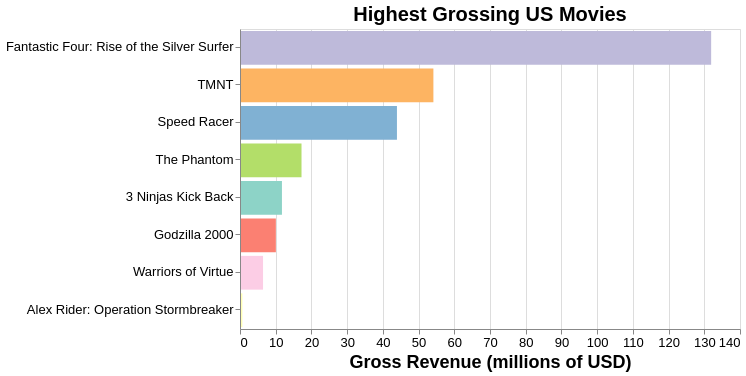

In [76]:

top_gross = alt.Chart(top_us_gross_df).transform_calculate(
    gross_revenue_per_million="datum.US_Gross/1000000"
).encode(
    y = alt.Y("Title:N"
               , title=None,
           sort=alt.EncodingSortField(
               field="gross_revenue_per_million",
              order="descending"),
          axis=alt.Axis(labelLimit=300)
             ),
     tooltip=[alt.Tooltip("Release_Year:N",
                          title="Release Year"),
             alt.Tooltip("Major_Genre:N",
                         title="Genre",
                         format="%Y"),
             alt.Tooltip("MPAA_Rating:N",
                         title="MPAA Rating",
                         format="%Y"),
             alt.Tooltip("gross_revenue_per_million:Q",
                         title="Gross Revenue (millions)",
                         format=".2f")],
).properties(
    title="Highest Grossing US Movies",
    width=500,
    height=300
).configure_axis(labelFontSize=13,titleFontSize=18
).configure_title(fontSize=20
)

top_us_gross_chart = top_gross.mark_bar(
).encode(
    alt.X("gross_revenue_per_million:Q", title="Gross Revenue (millions of USD)"),
    color = alt.Color("Title:N", legend=None,scale=alt.Scale(scheme="set3"))
)

top_us_gross_chart.interactive()

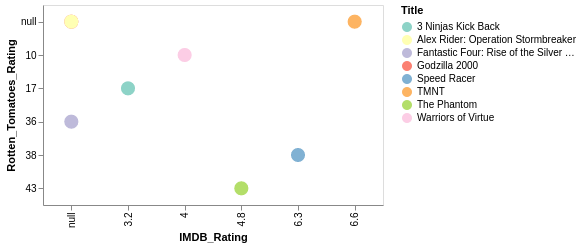

In [77]:
# rating visual copied from Sree's file
alt.Chart(top_10).mark_circle(size = 200,
                                  opacity=1).encode(
alt.X("IMDB_Rating:N"),
alt.Y("Rotten_Tomatoes_Rating:N"),
alt.Color("Title:O", scale=alt.Scale(scheme="set3")),
alt.Tooltip(["IMDB_Rating", "Rotten_Tomatoes_Rating", "Title"])).interactive().properties(
width=340,
height=200)